In [1]:
from IPython.display import HTML
%matplotlib inline
from IPython.core.debugger import set_trace

In [4]:
#I think I need 2 classes, one that creates the planet objects and calculates an array for position
#velocity, acceleration, Energy etc (methods), then a simulation class to take those values and 
#visually simulate them #need to build simulation on computer at lab
#methods will be 
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
class MakePlanet():
    
    def __init__(self, xpos, ypos, mass, vx, vy):
        G = 6.67*(10**-11)
        self.xpos = xpos
        self.ypos = ypos
        self.radius = np.array([self.xpos, self.ypos])
        self.mass = mass
        self.vx = vx
        self.vy = vy
        self.v = np.array([self.vx, self.vy])
        self.a_prev = np.array([0.0,0.0])
        self.init_accel(G)
        self.a_new = np.array([0.0,0.0])
        self.ke = 0
        self.pe = 0
        self.te = 0
        self.energy_array = []
      
    def init_accel(self,G):
    
        self.a = np.array([0.0,0.0])
        with open('Compsimfile.txt','r') as f:
            data = np.loadtxt('Compsimfile.txt', delimiter = " ", skiprows=2, usecols=[1,2,3])
            for line in data:
                for i in range(len(line)):
                    if self.mass != data[i][2]: 
                        self.a -= G*(data[i][2])*(np.array([self.xpos, self.ypos])-(np.array([data[i][0], 0])))/(np.linalg.norm(np.array([self.xpos, self.ypos])-(np.array([data[i][0], 0])))**3)
                    else:
                        self.a += 0
   
   
    def update_r(self,dt):
        self.radius = (self.radius + self.v*dt + ((1/6)*((4*self.a-self.a_prev)*(dt**2))))
    
    def update_v(self,dt):
        #MakeSimulation.calc_acc
        self.v = (self.v + ((1/6)*(2*self.a_new + 5*self.a - self.a_prev)*dt))
        self.a_prev = self.a
        self.a = self.a_new

        
        
class MakeSimulation():
    #calc force method is in simulation
    #do i need to call body class here?
  
    def __init__(self):
        #manually create objects
        self.timesteps = 1000
        self.dt = 100000
        
        filename = 'Compsimfile.txt'
        self.read_data(filename)
        self.lis = []
#         self.xmax = 2*np.pi
        for i in range(0, 5):
            self.lis.append(MakePlanet(self.data[i,0], self.data[i,1], self.data[i,2], self.data[i,3], self.data[i,4]))
    
    def read_data(self,filename):
            with open(filename,'r') as f:
                self.data = np.loadtxt(filename, delimiter = " ", skiprows=2, usecols=[1,2,3,4,5])
                
    
    def k_energy(self,p):
        
        self.lis[p].ke = .5*self.lis[p].mass*(norm(self.lis[p].v))**2
    
    def potential_energy(self,p):

        G = 6.67E-11
        self.lis[p].pe = 0
        #want to use update acceleration method in here
        for thatplanet in self.lis:
            
            if self.lis[p].mass != thatplanet.mass :
                
                self.lis[p].pe -= G*self.lis[p].mass*thatplanet.mass/(norm(self.lis[p].radius-thatplanet.radius))
                                     
        
    def tot_energy(self,p):
#         set_trace()
        self.k_energy(p)
        self.potential_energy(p)
        self.lis[p].te = self.lis[p].pe + self.lis[p].ke
        self.lis[p].energy_array.append(self.lis[p].te)
        


    def run(self,G):
        for p in range(0, len(self.lis)):
#             set_trace()
          
            self.tot_energy(p)
            self.lis[p].update_r(self.dt)
            self.calc_acc(G, p)
            self.lis[p].update_v(self.dt)
            
           
                
#use norm and change grav equation write equivalency for r vector 
    def calc_acc(self,G, i):
        #j.accel = 0
        a = np.array([0.0,0.0])
        for j in range(0, len(self.lis)):  
            if self.lis[i].mass != self.lis[j].mass:
                a -= (G*self.data[j][2]*((self.lis[i].radius)-(self.lis[j].radius))/(np.linalg.norm(np.array([self.lis[i].radius])-np.array([self.lis[j].radius]))**3))
        self.lis[i].a_new = a
           
    def calc_orb(self):
        self.timesteps = 0
        for i in range(0, len(self.lis)):
            if self.lis[i].ypos != 0:
                self.timesteps += 1
            else:
                self.period = (2*self.timesteps)/(self.lis[3].timesteps)
            print(self.lis[i], "period is", self.period)
    #method to graph total energy?
    def init(self):
        return self.patches    
    
    '''def runSim(self):
        theta = np.linspace(0, 2*np.pi, 500)
        self.xpos = np.cos(theta)
        self.ypos = np.sin(theta)
'''
    def animate(self,i):
        G = 6.67E-11
        self.run(G)
        for i in range(0, len(self.patches)):
            #self.patches[i].center = (self.lis[i].xpos,self.lis[i].ypos)
            self.patches[i].center = (self.lis[i].radius)
            #print((self.lis[i].xpos,self.lis[i].ypos))
        return self.patches
            
    def run_visual(self):
        fig = plt.figure()
        ax = plt.axes()
        self.patches = []
        color = ['r','b','g']
        for i in range(0, len(self.lis)):
            self.patches.append(plt.Circle(((self.lis[i].xpos,self.lis[i].ypos)), 10**10, color = 'b', animated = True))
        for i in range(0, len(self.patches)):
            ax.add_patch(self.patches[i])
        ax.axis('scaled')
        ax.set_xlim(-3E11, 3E11)
        ax.set_ylim(-3E11, 3E11)
        numFrames = 1000
        anim = FuncAnimation(fig, self.animate,frames = numFrames, repeat=False, 
                             interval = 20, blit=True)
        plt.close(anim._fig)

    
        return anim




def main():
    #read in data to create planets
    '''
    names = ['Sun','Mercury','Venus','Earth','Mars']
    for i in range(0,len(names)):
        test_planet = MakePlanet(10, 0, 5E20, 10, 10)
    '''
    sim = MakeSimulation()
    anim = sim.run_visual()

    
    return anim,sim
    
anim,sim = main()
    



In [5]:
HTML(anim.to_html5_video())

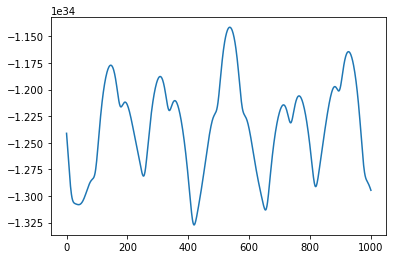

In [27]:
y_ = sim.lis[0].energy_array
    
x_ = np.arange(0,len(y_))
    
plt.plot(x_,y_)
plt.show()



In [25]:
y_[7]

-1.2691557601492732e+34

In [53]:
with open('Compsimfile.txt','r') as f:

    data = np.loadtxt('Compsimfile.txt', delimiter = " ", skiprows=2, usecols=[1,2,3,4,5])



7.956e+30

In [48]:
a += np.array([3,4])

In [49]:
a

array([12, 16])

In [ ]:
te